<a href="https://colab.research.google.com/github/TarunaSahu/Best-locality-for-restaurant/blob/main/TarunaSahuMtechFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing neccesary libraries
import requests
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import json
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
import folium
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('Area.csv')
df

,Neighborhood
0,AB Road
1,Abhinandan Nagar Road
2,Alok Nagar Row Houses
3,Annapurna Road
4,Anoop Nagar
...,...
70,Vijay Nagar
71,Vishnu Puri Colony
72,White Church Colony
73,Yeshwant Niwas Road


In [ ]:
# Extracting Co-ordinates of the neighbourhood
lat=[]
lon=[]
for x in df.Neighborhood:
    location=None

    while location is None:
        geolocator=Nominatim(user_agent="Indore")
        location=geolocator.geocode('{}, Indore, India'.format(x))
        x=str(x).split(" ")[:-1]
    lat.append(location.latitude)
    print(location)
    print(location.latitude)
    lon.append(location.longitude)
    print(location.longitude)

Mahindra Motors, Sagar Automobiles Pvt. Ltd,, Plot No. 8-13, Service Road, Indore, Indore Tahsil, Indore District, Madhya Pradesh, 452001, India
22.7665444
75.9006944
Abhinandan Park, Indore, Malharganj Tahsil, Indore District, Madhya Pradesh, India
22.76193285
75.86498462043414
Alok Pathology Lab, L. I. G. Square - Patnipura Square Road, Indore, Indore Tahsil, Indore District, Madhya Pradesh, 452001, India
22.7351868
75.8881286
Annapurna Road, Silver Oaks, Vaishali Nagar, Indore, Indore Tahsil, Indore District, Madhya Pradesh, 452001, India
22.6943199
75.8387805
Anoop Nagar Rahwasi Sangh Udyaan, Indore, Indore Tahsil, Indore District, Madhya Pradesh, India
22.731192200000002
75.89325865
Ashish Nagar Garden, Lokhandwaala street, Indore, Indore Tahsil, Indore District, Madhya Pradesh, 452001, India
22.71567865
75.9088482904267
Vora Wires Industries (India) Limited, Malharganj Tahsil, Indore District, Madhya Pradesh, India
22.7558997
75.84402468929906
Bengali Colony Station, Kanadia Road

Vora Wires Industries (India) Limited, Malharganj Tahsil, Indore District, Madhya Pradesh, India
22.7558997
75.84402468929906


In [ ]:
#Adding coordinates into the dataframe
df["latitude"]=lat
df["longitude"]=lon
df.head()

,Neighborhood,latitude,longitude
0,AB Road,22.766544,75.900694
1,Abhinandan Nagar Road,22.761933,75.864985
2,Alok Nagar Row Houses,22.735187,75.888129
3,Annapurna Road,22.694320,75.838780
4,Anoop Nagar,22.731192,75.893259


In [ ]:
# Summary check on the datatypes, and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neighborhood  75 non-null     object 
 1   latitude      75 non-null     float64
 2   longitude     75 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.9+ KB


In [ ]:
df.to_csv('Area1.csv',index=False)

In [ ]:
#Visualizing the neighborhoods of Indore on map
Indore_map=folium.Map(location=[22.7196,75.8577],zoom_start=10)
for lat, lng, neighborhood in zip(df['latitude'], df['longitude'],df['Neighborhood']):
    label = '{}, Indore'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Indore_map)
Indore_map

In [ ]:
#FourSquare Credentials
CLIENT_ID='HBQ1QJTILHSLNN0PQXFOY0MTA5QYSOCFG0GYKOJYDFBZTYSH'
CLIENT_SECRET='AZXGBWSNOHWWDXWTXKRW5BJV2IGCA1OAUFNA3VNSTXNWRV2G'
LIMIT=100
VERSION='20180604'

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):

    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)

        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            LIMIT)

        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            lat,
            lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                  'Neighborhood Latitude',
                  'Neighborhood Longitude',
                  'Venue',
                  'Venue Latitude',
                  'Venue Longitude',
                  'Venue Category']

    return(nearby_venues)

In [ ]:
#Getting the values using function
venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['latitude'],
                                   longitudes=df['longitude']
                                  )

AB Road
Abhinandan Nagar Road
Alok Nagar Row Houses
Annapurna Road
Anoop Nagar
Ashish Nagar
Bairathi Colony
Bengali Square
Bhagirath Pura
Bicholi Hapsi Road
Bicholi Mardana Road
Bypass Road
Chhavni
Dhar Road
Girdhar Nagar
IDA Scheme 140
Indore - Pithampur Road
Jail Road
Jawahar Marg
Kalindi Kunj
Kalindi Mid Town
Kanadia Road
Keshar Bagh Road
Khajrana Road
Khajuri Bazaar
Khandwa Road
Khatiwala Tank
Lokmanya Nagar
Maanavta Nagar
Manik Bagh Road
Manishpuri
Manorama Ganj
MG Road
Morya Hills
MR 10 Road
MTH Compound
Nai Duniya
Nanda Nagar
New Palasia
Nihalpur
Niranjanpur Circle
Old Palasia
Palakhedi
Pardesi Pura
Pipliya Road
Pipliyahana Square
Race Course Road
Rajendra Nagar
Rajwada
Rani Sati Gate
Regional Park Road
Ring Road
RNT Marg
Sainath Colony
Sanvid Nagar
Sapna Sangeeta Road
Sarv Suvidha Nagar
Scheme No.54
Shiv Shakti Nagar Road
Shree Nagar Extension
Siyaganj
Sneh Nagar
Snehlataganj
South Tukoganj
Super Corridor
Telephone Nagar
Tilak Nagar Main Road
Tukoganj
Ujjain Road
Vandana Nagar 

In [ ]:
# DataFrame by nearby Venues
print(venues.shape)
venues.head()

(171, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,AB Road,22.766544,75.900694,Malwa Restaurant,22.766002,75.900018,Indian Restaurant
1,Alok Nagar Row Houses,22.735187,75.888129,Shoppers Stop Indore,22.736239,75.891010,Shopping Mall
2,Alok Nagar Row Houses,22.735187,75.888129,Hotel Shreemaya Residency,22.735864,75.890749,Hotel
3,Alok Nagar Row Houses,22.735187,75.888129,Cafe Coco Cabana,22.730951,75.888917,Café
4,Alok Nagar Row Houses,22.735187,75.888129,Hotel Ginger,22.736387,75.891164,Asian Restaurant


In [ ]:
venues.to_csv("Venue.csv",index=False)

In [ ]:
venues["Venue Category"].value_counts()

Indian Restaurant          15
Hotel                      13
Fast Food Restaurant       11
Coffee Shop                 9
Bus Station                 9
Ice Cream Shop              9
Snack Place                 8
Café                        8
Shopping Mall               7
ATM                         6
Bakery                      5
Restaurant                  5
Historic Site               4
Market                      3
Train Station               3
Grocery Store               3
Juice Bar                   3
Garden                      3
Tea Room                    3
Smoke Shop                  2
Plaza                       2
Department Store            2
Park                        2
Gym                         2
Lake                        2
Pizza Place                 2
Multiplex                   2
Bar                         2
Food & Drink Shop           1
Movie Theater               1
Cricket Ground              1
Cosmetics Shop              1
Flea Market                 1
Diner     

In [ ]:
venues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighborhood            171 non-null    object 
 1   Neighborhood Latitude   171 non-null    float64
 2   Neighborhood Longitude  171 non-null    float64
 3   Venue                   171 non-null    object 
 4   Venue Latitude          171 non-null    float64
 5   Venue Longitude         171 non-null    float64
 6   Venue Category          171 non-null    object 
dtypes: float64(4), object(3)
memory usage: 9.5+ KB


In [ ]:
#Count by nearby venues
venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
AB Road,1,1,1,1,1,1
Alok Nagar Row Houses,5,5,5,5,5,5
Anoop Nagar,4,4,4,4,4,4
Ashish Nagar,4,4,4,4,4,4
Bengali Square,4,4,4,4,4,4
Bicholi Hapsi Road,1,1,1,1,1,1
Bicholi Mardana Road,1,1,1,1,1,1
Chhavni,4,4,4,4,4,4
Dhar Road,6,6,6,6,6,6


In [ ]:
# Unique Categories
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 54 uniques categories.


### Clustering accoring to venue categories

In [ ]:
# Analyzing each category for each neighbourhood
# one hot encoding
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Neighborhood'] =venues['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

onehot.head()

,Neighborhood,ATM,Accessories Store,Airport,Asian Restaurant,BBQ Joint,Bakery,Bar,Bus Station,Bus Stop,...,Smoke Shop,Snack Place,South Indian Restaurant,Stadium,Street Art,Tea Room,Train Station,Wings Joint,Women's Store,Zoo
0,AB Road,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alok Nagar Row Houses,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alok Nagar Row Houses,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Alok Nagar Row Houses,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Alok Nagar Row Houses,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Dimension of given dataframe
onehot.shape

(171, 55)

In [ ]:
#Grouping by neighborhoods

grouped = onehot.groupby('Neighborhood').mean().reset_index()
grouped

,Neighborhood,ATM,Accessories Store,Airport,Asian Restaurant,BBQ Joint,Bakery,Bar,Bus Station,Bus Stop,...,Smoke Shop,Snack Place,South Indian Restaurant,Stadium,Street Art,Tea Room,Train Station,Wings Joint,Women's Store,Zoo
0,AB Road,0.000000,0.0,0.00,0.0,0.00,0.000000,0.00,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.00
1,Alok Nagar Row Houses,0.000000,0.0,0.00,0.2,0.00,0.000000,0.00,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.00
2,Anoop Nagar,0.000000,0.0,0.00,0.0,0.00,0.000000,0.00,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.00
3,Ashish Nagar,0.000000,0.0,0.00,0.0,0.00,0.250000,0.00,0.250000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.00
4,Bengali Square,0.000000,0.0,0.00,0.0,0.00,0.000000,0.00,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.00
5,Bicholi Hapsi Road,0.000000,0.0,0.00,0.0,0.00,0.000000,0.00,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.00
6,Bicholi Mardana Road,0.000000,0.0,0.00,0.0,0.00,0.000000,0.00,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.00
7,Chhavni,0.000000,0.0,0.00,0.0,0.00,0.000000,0.00,0.500000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.25
8,Dhar Road,0.000000,0.0,0.00,0.0,0.00,0.000000,0.00,0.166667,0.0,...,0.000000,0.000000,0.0,0.0,0.166667,0.000000,0.00,0.00,0.166667,0.00
9,Girdhar Nagar,0.333333,0.0,0.00,0.0,0.00,0.000000,0.00,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.00


In [ ]:
#Dimensions of given dataframe

grouped.shape

(41, 55)

In [ ]:
#Best five venues for each neighborhoods

for hood in grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = grouped[grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head())
    print('\n')

----AB Road----
               venue  freq
0  Indian Restaurant   1.0
1                ATM   0.0
2          Pool Hall   0.0
3          Juice Bar   0.0
4               Lake   0.0


----Alok Nagar Row Houses----
              venue  freq
0             Hotel   0.4
1  Asian Restaurant   0.2
2              Café   0.2
3     Shopping Mall   0.2
4         Pool Hall   0.0


----Anoop Nagar----
                  venue  freq
0                 Hotel  0.25
1                Market  0.25
2                  Café  0.25
3  Fast Food Restaurant  0.25
4             Pool Hall  0.00


----Ashish Nagar----
         venue  freq
0   Restaurant  0.25
1         Lake  0.25
2       Bakery  0.25
3  Bus Station  0.25
4          ATM  0.00


----Bengali Square----
               venue  freq
0        Coffee Shop  0.50
1  Indian Restaurant  0.25
2         Restaurant  0.25
3          Juice Bar  0.00
4               Lake  0.00


----Bicholi Hapsi Road----
               venue  freq
0              Hotel   1.0
1          Po

In [ ]:
#Function to return most common venues

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
#Extracting 10 most common venues in a dataframe

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = grouped['Neighborhood']

for ind in np.arange(grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,AB Road,Indian Restaurant,ATM,Pool Hall,Juice Bar,Lake,Market,Men's Store,Motel,Movie Theater,Multiplex
1,Alok Nagar Row Houses,Hotel,Asian Restaurant,Café,Shopping Mall,Pool Hall,Juice Bar,Lake,Market,Men's Store,Motel
2,Anoop Nagar,Hotel,Market,Café,Fast Food Restaurant,Pool Hall,Juice Bar,Lake,Men's Store,Motel,Movie Theater
3,Ashish Nagar,Restaurant,Lake,Bakery,Bus Station,ATM,Juice Bar,Market,Men's Store,Motel,Movie Theater
4,Bengali Square,Coffee Shop,Indian Restaurant,Restaurant,Juice Bar,Lake,Market,Men's Store,Motel,Movie Theater,Multiplex
5,Bicholi Hapsi Road,Hotel,Pool Hall,Indian Restaurant,Juice Bar,Lake,Market,Men's Store,Motel,Movie Theater,Multiplex
6,Bicholi Mardana Road,Hotel,Pool Hall,Indian Restaurant,Juice Bar,Lake,Market,Men's Store,Motel,Movie Theater,Multiplex
7,Chhavni,Bus Station,Zoo,Indian Restaurant,Wings Joint,Train Station,Juice Bar,Lake,Market,Men's Store,Motel
8,Dhar Road,Women's Store,Street Art,Bus Station,Motel,Fast Food Restaurant,Pizza Place,ATM,Plaza,Juice Bar,Lake
9,Girdhar Nagar,ATM,Grocery Store,Shopping Mall,Pool Hall,Juice Bar,Lake,Market,Men's Store,Motel,Movie Theater


In [ ]:
#Using K-means clustering

# set number of clusters
kclusters = 5

grouped_clustering = grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

<ipython-input-141-bd2c38308d00>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  grouped_clustering = grouped.drop('Neighborhood', 1)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 3, 1, 1, 0, 3, 3, 1, 1, 2], dtype=int32)

In [ ]:
#Adding clustering labels and merge the dataframes

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

merged = df

# merge grouped with data to add latitude/longitude for each neighborhood
merged = merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
merged = merged.drop(merged[merged['Cluster Labels'].isna()].index)
merged.reset_index(drop=True,inplace=True)
merged # check the last columns!

,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,AB Road,22.766544,75.900694,0.0,Indian Restaurant,ATM,Pool Hall,Juice Bar,Lake,Market,Men's Store,Motel,Movie Theater,Multiplex
1,Alok Nagar Row Houses,22.735187,75.888129,3.0,Hotel,Asian Restaurant,Café,Shopping Mall,Pool Hall,Juice Bar,Lake,Market,Men's Store,Motel
2,Anoop Nagar,22.731192,75.893259,1.0,Hotel,Market,Café,Fast Food Restaurant,Pool Hall,Juice Bar,Lake,Men's Store,Motel,Movie Theater
3,Ashish Nagar,22.715679,75.908848,1.0,Restaurant,Lake,Bakery,Bus Station,ATM,Juice Bar,Market,Men's Store,Motel,Movie Theater
4,Bengali Square,22.720532,75.902777,0.0,Coffee Shop,Indian Restaurant,Restaurant,Juice Bar,Lake,Market,Men's Store,Motel,Movie Theater,Multiplex
5,Bicholi Hapsi Road,22.696361,75.927940,3.0,Hotel,Pool Hall,Indian Restaurant,Juice Bar,Lake,Market,Men's Store,Motel,Movie Theater,Multiplex
6,Bicholi Mardana Road,22.696361,75.927940,3.0,Hotel,Pool Hall,Indian Restaurant,Juice Bar,Lake,Market,Men's Store,Motel,Movie Theater,Multiplex
7,Chhavni,22.705333,75.874333,1.0,Bus Station,Zoo,Indian Restaurant,Wings Joint,Train Station,Juice Bar,Lake,Market,Men's Store,Motel
8,Dhar Road,22.710414,75.832364,1.0,Women's Store,Street Art,Bus Station,Motel,Fast Food Restaurant,Pizza Place,ATM,Plaza,Juice Bar,Lake
9,Girdhar Nagar,22.714588,75.896927,2.0,ATM,Grocery Store,Shopping Mall,Pool Hall,Juice Bar,Lake,Market,Men's Store,Motel,Movie Theater


In [ ]:
#Visualizing all clusters

# create map
map_clusters = folium.Map(location=[22.7196,75.8577], zoom_start=11)
merged.dropna()
merged.reset_index(drop=True,inplace=True)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged['latitude'], merged['longitude'], merged['Neighborhood'], merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

In [ ]:
#Cluster 1
merged.loc[merged['Cluster Labels'] == 0,merged.columns[[0] + list(range(4, merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,AB Road,Indian Restaurant,ATM,Pool Hall,Juice Bar,Lake,Market,Men's Store,Motel,Movie Theater,Multiplex
4,Bengali Square,Coffee Shop,Indian Restaurant,Restaurant,Juice Bar,Lake,Market,Men's Store,Motel,Movie Theater,Multiplex
29,Sainath Colony,Hotel,Snack Place,Coffee Shop,Indian Restaurant,Train Station,Plaza,Juice Bar,Lake,Market,Men's Store
34,Sneh Nagar,Hotel,Snack Place,Coffee Shop,Indian Restaurant,Train Station,Plaza,Juice Bar,Lake,Market,Men's Store
36,Tilak Nagar Main Road,ATM,Snack Place,Coffee Shop,Indian Restaurant,Train Station,Plaza,Juice Bar,Lake,Market,Men's Store
38,Vishnu Puri Colony,Indian Restaurant,Snack Place,ATM,Pool Hall,Juice Bar,Lake,Market,Men's Store,Motel,Movie Theater


In [ ]:
merged.loc[merged['Cluster Labels'] == 0,merged.columns[[0] + list(range(4, merged.shape[1]))]]['1st Most Common Venue'].value_counts().head()

Indian Restaurant    2
Hotel                2
Coffee Shop          1
ATM                  1
Name: 1st Most Common Venue, dtype: int64

In [ ]:
#Cluster 2
merged.loc[merged['Cluster Labels'] == 1,merged.columns[[0] + list(range(4, merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Anoop Nagar,Hotel,Market,Café,Fast Food Restaurant,Pool Hall,Juice Bar,Lake,Men's Store,Motel,Movie Theater
3,Ashish Nagar,Restaurant,Lake,Bakery,Bus Station,ATM,Juice Bar,Market,Men's Store,Motel,Movie Theater
7,Chhavni,Bus Station,Zoo,Indian Restaurant,Wings Joint,Train Station,Juice Bar,Lake,Market,Men's Store,Motel
8,Dhar Road,Women's Store,Street Art,Bus Station,Motel,Fast Food Restaurant,Pizza Place,ATM,Plaza,Juice Bar,Lake
10,Jail Road,Stadium,Snack Place,ATM,Plaza,Indian Restaurant,Juice Bar,Lake,Market,Men's Store,Motel
11,Jawahar Marg,Historic Site,Bakery,ATM,Pool Hall,Juice Bar,Lake,Market,Men's Store,Motel,Movie Theater
12,Khajrana Road,Market,BBQ Joint,Garden,Fast Food Restaurant,ATM,Pool Hall,Lake,Men's Store,Motel,Movie Theater
13,Khatiwala Tank,Fast Food Restaurant,Wings Joint,Tea Room,ATM,Plaza,Juice Bar,Lake,Market,Men's Store,Motel
14,Lokmanya Nagar,Indian Restaurant,Train Station,Bakery,Tea Room,Farmers Market,Plaza,Juice Bar,Lake,Market,Men's Store
15,Manishpuri,Gym,Garden,Snack Place,Coffee Shop,Shopping Mall,ATM,Plaza,Lake,Market,Men's Store


In [ ]:
merged.loc[merged['Cluster Labels'] == 1,merged.columns[[0] + list(range(4, merged.shape[1]))]]['1st Most Common Venue'].value_counts().head()

Indian Restaurant    3
Bus Station          2
Historic Site        2
Ice Cream Shop       2
Hotel                1
Name: 1st Most Common Venue, dtype: int64

In [ ]:
# Cluster 3
merged.loc[merged['Cluster Labels'] == 2,merged.columns[[0] + list(range(4, merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Girdhar Nagar,ATM,Grocery Store,Shopping Mall,Pool Hall,Juice Bar,Lake,Market,Men's Store,Motel,Movie Theater
16,Morya Hills,ATM,Shopping Mall,Pool Hall,Indian Restaurant,Juice Bar,Lake,Market,Men's Store,Motel,Movie Theater
25,Rani Sati Gate,ATM,Pool Hall,Indian Restaurant,Juice Bar,Lake,Market,Men's Store,Motel,Movie Theater,Multiplex
35,South Tukoganj,ATM,Indian Restaurant,Pool Hall,Juice Bar,Lake,Market,Men's Store,Motel,Movie Theater,Multiplex
37,Vandana Nagar Main Road,ATM,Grocery Store,Shopping Mall,Hotel,BBQ Joint,Restaurant,Lake,Market,Men's Store,Motel


In [ ]:
merged.loc[merged['Cluster Labels'] == 2,merged.columns[[0] + list(range(4, merged.shape[1]))]]['1st Most Common Venue'].value_counts().head()

ATM    5
Name: 1st Most Common Venue, dtype: int64

In [ ]:
#Cluster 4
merged.loc[merged['Cluster Labels'] == 3,merged.columns[[0] + list(range(4, merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Alok Nagar Row Houses,Hotel,Asian Restaurant,Café,Shopping Mall,Pool Hall,Juice Bar,Lake,Market,Men's Store,Motel
5,Bicholi Hapsi Road,Hotel,Pool Hall,Indian Restaurant,Juice Bar,Lake,Market,Men's Store,Motel,Movie Theater,Multiplex
6,Bicholi Mardana Road,Hotel,Pool Hall,Indian Restaurant,Juice Bar,Lake,Market,Men's Store,Motel,Movie Theater,Multiplex
28,RNT Marg,Hotel,Ice Cream Shop,Multiplex,Cosmetics Shop,Restaurant,Pool Hall,Juice Bar,Lake,Market,Men's Store
31,Scheme No.54,Hotel,Grocery Store,Restaurant,Airport,Women's Store,Plaza,Juice Bar,Lake,Market,Men's Store


In [ ]:
merged.loc[merged['Cluster Labels'] == 3,merged.columns[[0] + list(range(4, merged.shape[1]))]]['1st Most Common Venue'].value_counts().head()

Hotel    5
Name: 1st Most Common Venue, dtype: int64

In [ ]:
#Cluster 5
merged.loc[merged['Cluster Labels'] == 4,merged.columns[[0] + list(range(4, merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,Ring Road,Bar,ATM,Restaurant,Juice Bar,Lake,Market,Men's Store,Motel,Movie Theater,Multiplex


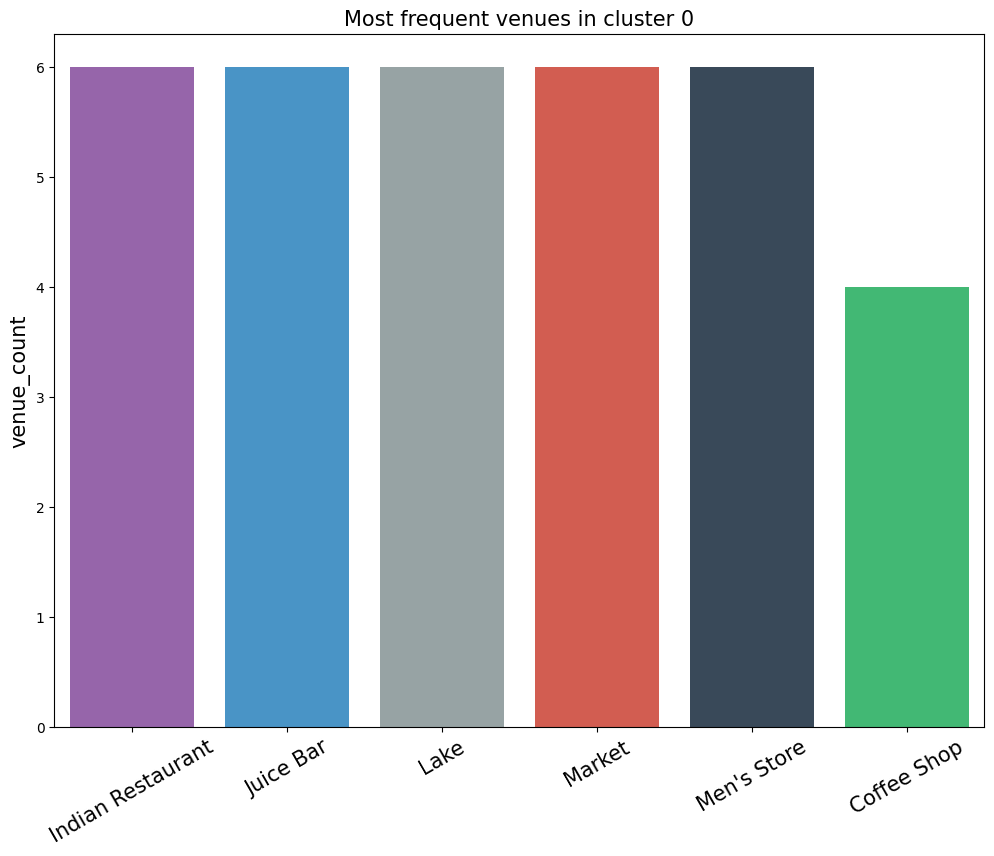

In [ ]:
clus1 = pd.DataFrame(pd.DataFrame(list(merged[merged['Cluster Labels'] == 0].iloc[:, 4:15].values.ravel()), columns = ['venue_count'])['venue_count'].value_counts()[:6])

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
fig, ax = plt.subplots(figsize=(12, 9))
ax = sns.barplot(x = clus1.index, y = clus1['venue_count'], palette=(flatui))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30,  fontsize = 15)
ax.yaxis.label.set_size(15)
plt.title('Most frequent venues in cluster 0', fontsize = 15)
plt.show()

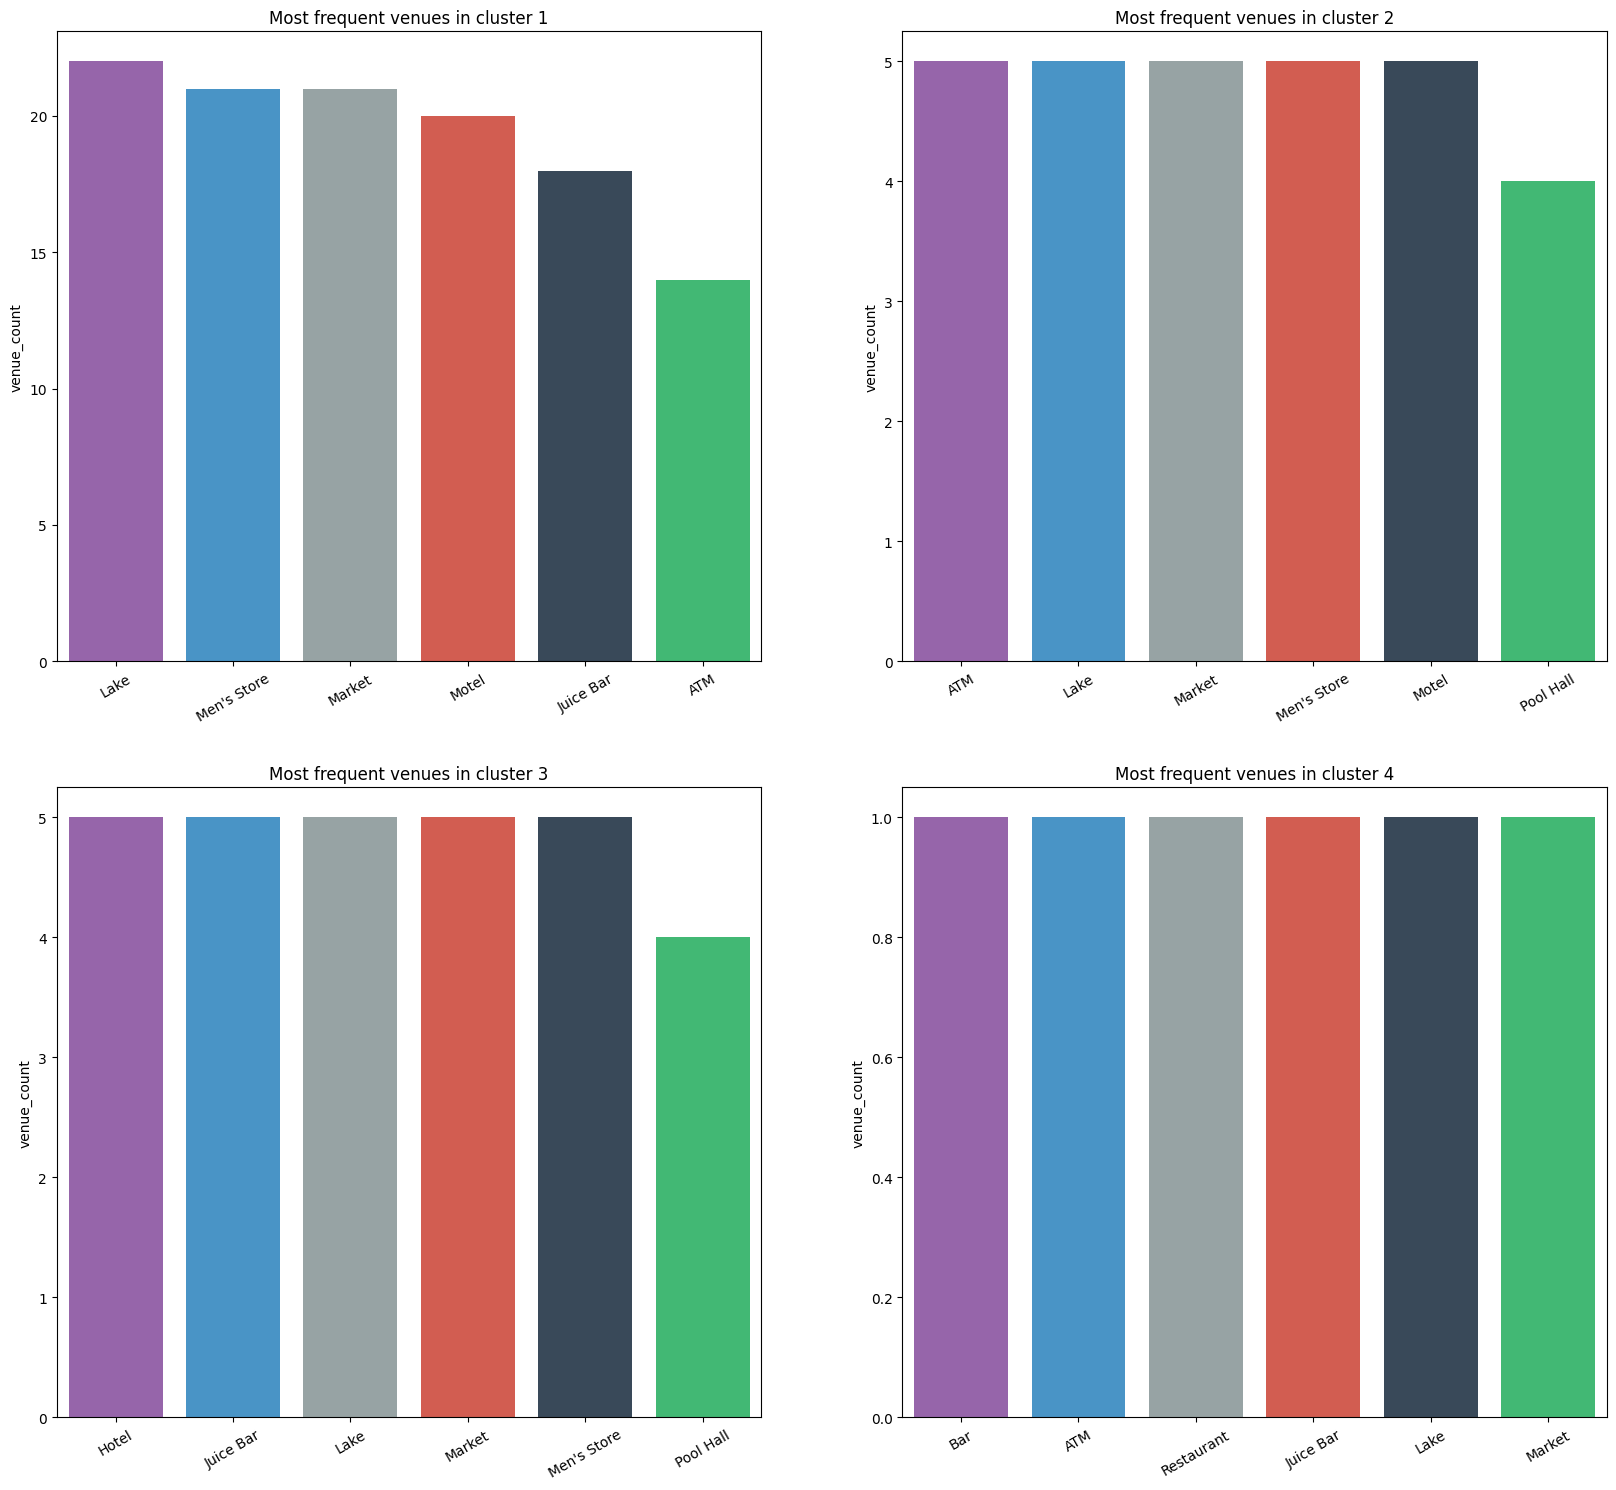

In [ ]:
clus1 = pd.DataFrame(pd.DataFrame(list(merged[merged['Cluster Labels'] == 1].iloc[:, 4:15].values.ravel()), columns = ['venue_count'])['venue_count'].value_counts()[:6])
clus2 = pd.DataFrame(pd.DataFrame(list(merged[merged['Cluster Labels'] == 2].iloc[:, 4:15].values.ravel()), columns = ['venue_count'])['venue_count'].value_counts()[:6])
clus3 = pd.DataFrame(pd.DataFrame(list(merged[merged['Cluster Labels'] == 3].iloc[:, 4:15].values.ravel()), columns = ['venue_count'])['venue_count'].value_counts()[:6])
clus4 = pd.DataFrame(pd.DataFrame(list(merged[merged['Cluster Labels'] == 4].iloc[:, 4:15].values.ravel()), columns = ['venue_count'])['venue_count'].value_counts()[:6])
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
fig, ax = plt.subplots(2,2, figsize = (20, 18))


plt.subplot(2, 2, 1)
ax = sns.barplot(x = clus1.index, y = clus1['venue_count'], palette=(flatui))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
plt.title('Most frequent venues in cluster 1')

plt.subplot(2, 2, 2)
ax = sns.barplot(x = clus2.index, y = clus2['venue_count'], palette=(flatui))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
plt.title('Most frequent venues in cluster 2')

plt.subplot(2, 2, 3)
ax = sns.barplot(x = clus3.index, y = clus3['venue_count'], palette=(flatui))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
plt.title('Most frequent venues in cluster 3', )

plt.subplot(2, 2, 4)
ax = sns.barplot(x = clus4.index, y = clus4['venue_count'], palette=(flatui))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
plt.title('Most frequent venues in cluster 4', )


plt.show()

In [ ]:
best_venues=merged.loc[merged['Cluster Labels'] == 1]
for col in best_venues.columns:
    if(col!="latitude" and col!="longitude" and col!="Cluster Labels"):
        best_venues = best_venues.drop(best_venues[best_venues[col].str.contains('Restaurant', na = False)].index)
best_venues.reset_index(drop=True,inplace=True)
best_venues

,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Jawahar Marg,22.716441,75.859498,1.0,Historic Site,Bakery,ATM,Pool Hall,Juice Bar,Lake,Market,Men's Store,Motel,Movie Theater
1,Manishpuri,22.726366,75.900736,1.0,Gym,Garden,Snack Place,Coffee Shop,Shopping Mall,ATM,Plaza,Lake,Market,Men's Store
2,Rajwada,22.718434,75.854776,1.0,Historic Site,Juice Bar,Bakery,Snack Place,Flea Market,Pool Hall,Lake,Market,Men's Store,Motel
3,Sapna Sangeeta Road,22.700531,75.868597,1.0,Lake,Market,Bakery,Shopping Mall,ATM,Pool Hall,Juice Bar,Men's Store,Motel,Movie Theater
4,Shiv Shakti Nagar Road,22.700485,75.830948,1.0,Men's Store,Garden,Food & Drink Shop,ATM,Ice Cream Shop,Juice Bar,Lake,Market,Motel,Movie Theater


### Clustering According to types of Restaurant

In [ ]:
indore_venues_restr = venues[venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
# set index to start from 1
indore_venues_restr.index = np.arange(1, len(indore_venues_restr)+1)
indore_venues_restr.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,AB Road,22.766544,75.900694,Malwa Restaurant,22.766002,75.900018,Indian Restaurant
2,Alok Nagar Row Houses,22.735187,75.888129,Hotel Ginger,22.736387,75.891164,Asian Restaurant
3,Anoop Nagar,22.731192,75.893259,"Fyi, Anand Bazaar",22.727599,75.894476,Fast Food Restaurant
4,Ashish Nagar,22.715679,75.908848,Rajshahi Palace Hotel Indore,22.718978,75.907209,Restaurant
5,Bengali Square,22.720532,75.902777,Indian Coffee House (ICH),22.720994,75.900052,Indian Restaurant


In [ ]:
print(f"Types of restaurants in Indore: {len(indore_venues_restr['Venue Category'].unique())}")


Types of restaurants in Indore: 6


In [ ]:
# create a dataframe with the venue category and counts
df_counts = indore_venues_restr['Venue Category'].value_counts().to_frame(name='counts')
df_counts = df_counts.reset_index()
df_counts.rename(index=str, columns={"index": "venue_category"}, inplace=True)

In [ ]:
df_counts

,venue_category,counts
0,Indian Restaurant,15
1,Fast Food Restaurant,11
2,Restaurant,5
3,Asian Restaurant,1
4,South Indian Restaurant,1
5,Falafel Restaurant,1


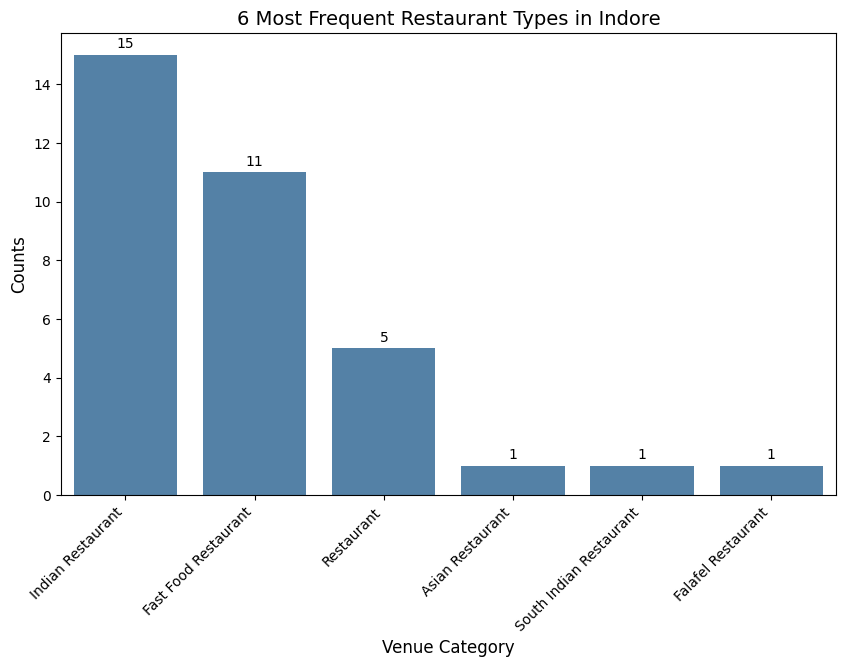

In [ ]:
fig = plt.figure(figsize=(10,6))
fig = sns.barplot(x='venue_category',y='counts',data=df_counts[0:10],color='steelblue')
plt.title('6 Most Frequent Restaurant Types in Indore', fontsize=14)
plt.xlabel("Venue Category", fontsize=12)
plt.ylabel ("Counts", fontsize=12)
plt.xticks(rotation=45,  horizontalalignment='right')

for bar in fig.patches:
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    fig.annotate(format(bar.get_height(), '.0f'),
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center',
                 va='center',
                 size=10, xytext=(0, 8),
                 textcoords='offset points')

plt.savefig("10 Most Frequent Restaurant Types in Indore.png")

plt.show()

In [ ]:
indore_venues_restr.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count()).sort_values()

Neighborhood
AB Road                  1
Rajendra Nagar           1
Race Course Road         1
RNT Marg                 1
Sneh Nagar               1
Vishnu Puri Colony       1
MTH Compound             1
Lokmanya Nagar           1
South Tukoganj           1
Khajrana Road            1
Dhar Road                1
Chhavni                  1
Tilak Nagar Main Road    1
Ashish Nagar             1
Anoop Nagar              1
Alok Nagar Row Houses    1
Sainath Colony           1
Scheme No.54             1
Nai Duniya               2
Khatiwala Tank           2
Bengali Square           2
Siyaganj                 2
New Palasia              4
Yeshwant Niwas Road      4
Name: Venue Category, dtype: int64

In [ ]:
# one hot encoding
indore_onehot = pd.get_dummies(indore_venues_restr[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
indore_onehot['Neighborhood'] = indore_venues_restr['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [indore_onehot.columns[-1]] + list(indore_onehot.columns[:-1])
indore_onehot = indore_onehot[fixed_columns]

indore_onehot.head()

,Neighborhood,Asian Restaurant,Falafel Restaurant,Fast Food Restaurant,Indian Restaurant,Restaurant,South Indian Restaurant
1,AB Road,0,0,0,1,0,0
2,Alok Nagar Row Houses,1,0,0,0,0,0
3,Anoop Nagar,0,0,1,0,0,0
4,Ashish Nagar,0,0,0,0,1,0
5,Bengali Square,0,0,0,1,0,0


In [ ]:
# check dataframe shape
print(f'new dataframe has {indore_onehot.shape[0]} rows, {indore_onehot.shape[1]} columns')

new dataframe has 34 rows, 7 columns


In [ ]:
#Group rows by neighborhood and take the mean of the frequency of occurrence of each restaurant category
indore_grouped = indore_onehot.groupby('Neighborhood').mean().reset_index()
indore_grouped

,Neighborhood,Asian Restaurant,Falafel Restaurant,Fast Food Restaurant,Indian Restaurant,Restaurant,South Indian Restaurant
0,AB Road,0.0,0.0,0.0,1.0,0.0,0.0
1,Alok Nagar Row Houses,1.0,0.0,0.0,0.0,0.0,0.0
2,Anoop Nagar,0.0,0.0,1.0,0.0,0.0,0.0
3,Ashish Nagar,0.0,0.0,0.0,0.0,1.0,0.0
4,Bengali Square,0.0,0.0,0.0,0.5,0.5,0.0
5,Chhavni,0.0,0.0,0.0,1.0,0.0,0.0
6,Dhar Road,0.0,0.0,1.0,0.0,0.0,0.0
7,Khajrana Road,0.0,0.0,1.0,0.0,0.0,0.0
8,Khatiwala Tank,0.0,0.0,1.0,0.0,0.0,0.0
9,Lokmanya Nagar,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# check dataframe shape
print(f'grouped dataframe has {indore_grouped.shape[0]} rows, {indore_grouped.shape[1]} columns')

grouped dataframe has 24 rows, 7 columns


In [ ]:
#print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for ward in indore_grouped['Neighborhood']:
    print("----"+ward+"----")
    temp = indore_grouped[indore_grouped['Neighborhood'] == ward].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----AB Road----
                  venue  freq
0     Indian Restaurant   1.0
1      Asian Restaurant   0.0
2    Falafel Restaurant   0.0
3  Fast Food Restaurant   0.0
4            Restaurant   0.0


----Alok Nagar Row Houses----
                  venue  freq
0      Asian Restaurant   1.0
1    Falafel Restaurant   0.0
2  Fast Food Restaurant   0.0
3     Indian Restaurant   0.0
4            Restaurant   0.0


----Anoop Nagar----
                  venue  freq
0  Fast Food Restaurant   1.0
1      Asian Restaurant   0.0
2    Falafel Restaurant   0.0
3     Indian Restaurant   0.0
4            Restaurant   0.0


----Ashish Nagar----
                  venue  freq
0            Restaurant   1.0
1      Asian Restaurant   0.0
2    Falafel Restaurant   0.0
3  Fast Food Restaurant   0.0
4     Indian Restaurant   0.0


----Bengali Square----
                  venue  freq
0     Indian Restaurant   0.5
1            Restaurant   0.5
2      Asian Restaurant   0.0
3    Falafel Restaurant   0.0
4  Fast Food

In [ ]:
#place these info into a dataframe
# Function to sort values in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
#create the new dataframe and display the top 5 venues for each neighborhood (i.e. ward)
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted1 = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted1['Neighborhood'] = indore_grouped['Neighborhood']

for ind in np.arange(indore_grouped.shape[0]):
    neighborhoods_venues_sorted1.iloc[ind, 1:] = return_most_common_venues(indore_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted1.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,AB Road,Indian Restaurant,Asian Restaurant,Falafel Restaurant,Fast Food Restaurant,Restaurant
1,Alok Nagar Row Houses,Asian Restaurant,Falafel Restaurant,Fast Food Restaurant,Indian Restaurant,Restaurant
2,Anoop Nagar,Fast Food Restaurant,Asian Restaurant,Falafel Restaurant,Indian Restaurant,Restaurant
3,Ashish Nagar,Restaurant,Asian Restaurant,Falafel Restaurant,Fast Food Restaurant,Indian Restaurant
4,Bengali Square,Indian Restaurant,Restaurant,Asian Restaurant,Falafel Restaurant,Fast Food Restaurant


In [ ]:
#Use Silhouette method to discover optimum k
# drop first column
indore_grouped_clustering = indore_grouped.drop('Neighborhood', axis=1)

In [ ]:
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(init='k-means++', n_clusters=k, random_state=42).fit(indore_grouped_clustering)
    cluster_labels = kmeans.labels_

    silhouette_avg = silhouette_score(indore_grouped_clustering, cluster_labels)
    print(f"For n_clusters: {k}, average silhouette score: {silhouette_avg:.3f}")

For n_clusters: 2, average silhouette score: 0.467
For n_clusters: 3, average silhouette score: 0.618
For n_clusters: 4, average silhouette score: 0.647
For n_clusters: 5, average silhouette score: 0.677
For n_clusters: 6, average silhouette score: 0.741
For n_clusters: 7, average silhouette score: 0.833
For n_clusters: 8, average silhouette score: 0.875
For n_clusters: 9, average silhouette score: 0.875
For n_clusters: 10, average silhouette score: 0.875


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
#The optimum k is 8. Run k-means to cluster the neighborhood into 8 clusters.

# set number of clusters
kclusters = 8

# run k-means clustering
#kmeans = KMeans(init='k-means++', n_clusters=kclusters, random_state=42).fit(indore_grouped_clustering)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(indore_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 5, 3, 1, 6, 2, 3, 3, 3, 2], dtype=int32)

In [ ]:
#create a new dataframe that includes the cluster as well as the top 5 venues for each neighborhood.

# add clustering labels
neighborhoods_venues_sorted1.insert(0, 'Cluster Labels', kmeans.labels_)

indore_merged = df
# Replace df_ward neighbour header'Name' to 'Neighborhood'
#indore_merged.rename(columns={'Neighborhood':'Neighborhood'}, inplace=True)
# merge dataframes and grouped dataframe to add latitude/longitude for each neighborhood
indore_merged = indore_merged.join(neighborhoods_venues_sorted1.set_index('Neighborhood'), on='Neighborhood')
indore_merged.head()


,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,AB Road,22.766544,75.900694,2.0,Indian Restaurant,Asian Restaurant,Falafel Restaurant,Fast Food Restaurant,Restaurant
1,Abhinandan Nagar Road,22.761933,75.864985,NaN,NaN,NaN,NaN,NaN,NaN
2,Alok Nagar Row Houses,22.735187,75.888129,5.0,Asian Restaurant,Falafel Restaurant,Fast Food Restaurant,Indian Restaurant,Restaurant
3,Annapurna Road,22.694320,75.838780,NaN,NaN,NaN,NaN,NaN,NaN
4,Anoop Nagar,22.731192,75.893259,3.0,Fast Food Restaurant,Asian Restaurant,Falafel Restaurant,Indian Restaurant,Restaurant


In [ ]:
indore_merged=indore_merged.fillna(0)
indore_merged = indore_merged.astype({"Cluster Labels": int})


In [ ]:
#Visualizing all clusters

# create map
map_clusters = folium.Map(location=[22.7196,75.8577], zoom_start=11)
merged.dropna()
merged.reset_index(drop=True,inplace=True)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(indore_merged['latitude'], indore_merged['longitude'], indore_merged['Neighborhood'], indore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

In [ ]:
indore_merged.loc[indore_merged['Cluster Labels'] == 0,
                 indore_merged.columns[[0] + list(range(4, indore_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Abhinandan Nagar Road,0,0,0,0,0
3,Annapurna Road,0,0,0,0,0
6,Bairathi Colony,0,0,0,0,0
8,Bhagirath Pura,0,0,0,0,0
9,Bicholi Hapsi Road,0,0,0,0,0
10,Bicholi Mardana Road,0,0,0,0,0
11,Bypass Road,0,0,0,0,0
14,Girdhar Nagar,0,0,0,0,0
15,IDA Scheme 140,0,0,0,0,0
16,Indore - Pithampur Road,0,0,0,0,0


In [ ]:
indore_merged.loc[indore_merged['Cluster Labels'] == 1,
                 indore_merged.columns[[0] + list(range(4, indore_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
5,Ashish Nagar,Restaurant,Asian Restaurant,Falafel Restaurant,Fast Food Restaurant,Indian Restaurant
52,RNT Marg,Restaurant,Asian Restaurant,Falafel Restaurant,Fast Food Restaurant,Indian Restaurant
57,Scheme No.54,Restaurant,Asian Restaurant,Falafel Restaurant,Fast Food Restaurant,Indian Restaurant


In [ ]:
indore_merged.loc[indore_merged['Cluster Labels'] == 2,
                 indore_merged.columns[[0] + list(range(4, indore_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,AB Road,Indian Restaurant,Asian Restaurant,Falafel Restaurant,Fast Food Restaurant,Restaurant
12,Chhavni,Indian Restaurant,Asian Restaurant,Falafel Restaurant,Fast Food Restaurant,Restaurant
27,Lokmanya Nagar,Indian Restaurant,Asian Restaurant,Falafel Restaurant,Fast Food Restaurant,Restaurant
47,Rajendra Nagar,Indian Restaurant,Asian Restaurant,Falafel Restaurant,Fast Food Restaurant,Restaurant
53,Sainath Colony,Indian Restaurant,Asian Restaurant,Falafel Restaurant,Fast Food Restaurant,Restaurant
61,Sneh Nagar,Indian Restaurant,Asian Restaurant,Falafel Restaurant,Fast Food Restaurant,Restaurant
63,South Tukoganj,Indian Restaurant,Asian Restaurant,Falafel Restaurant,Fast Food Restaurant,Restaurant
66,Tilak Nagar Main Road,Indian Restaurant,Asian Restaurant,Falafel Restaurant,Fast Food Restaurant,Restaurant
71,Vishnu Puri Colony,Indian Restaurant,Asian Restaurant,Falafel Restaurant,Fast Food Restaurant,Restaurant


In [ ]:
indore_merged.loc[indore_merged['Cluster Labels'] == 3,
                 indore_merged.columns[[0] + list(range(4, indore_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,Anoop Nagar,Fast Food Restaurant,Asian Restaurant,Falafel Restaurant,Indian Restaurant,Restaurant
13,Dhar Road,Fast Food Restaurant,Asian Restaurant,Falafel Restaurant,Indian Restaurant,Restaurant
23,Khajrana Road,Fast Food Restaurant,Asian Restaurant,Falafel Restaurant,Indian Restaurant,Restaurant
26,Khatiwala Tank,Fast Food Restaurant,Asian Restaurant,Falafel Restaurant,Indian Restaurant,Restaurant
46,Race Course Road,Fast Food Restaurant,Asian Restaurant,Falafel Restaurant,Indian Restaurant,Restaurant


In [ ]:
indore_merged.loc[indore_merged['Cluster Labels'] == 4,
                 indore_merged.columns[[0] + list(range(4, indore_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
35,MTH Compound,South Indian Restaurant,Asian Restaurant,Falafel Restaurant,Fast Food Restaurant,Indian Restaurant


In [ ]:
indore_merged.loc[indore_merged['Cluster Labels'] == 5,
                 indore_merged.columns[[0] + list(range(4, indore_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,Alok Nagar Row Houses,Asian Restaurant,Falafel Restaurant,Fast Food Restaurant,Indian Restaurant,Restaurant


In [ ]:
indore_merged.loc[indore_merged['Cluster Labels'] == 6,
                 indore_merged.columns[[0] + list(range(4, indore_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
7,Bengali Square,Indian Restaurant,Restaurant,Asian Restaurant,Falafel Restaurant,Fast Food Restaurant
60,Siyaganj,Indian Restaurant,Restaurant,Asian Restaurant,Falafel Restaurant,Fast Food Restaurant


In [ ]:
indore_merged.loc[indore_merged['Cluster Labels'] == 7,
                 indore_merged.columns[[0] + list(range(4, indore_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
36,Nai Duniya,Falafel Restaurant,Fast Food Restaurant,Asian Restaurant,Indian Restaurant,Restaurant


### Clustering /   Recommending

In [ ]:
indore_price=pd.read_csv('Area_range.csv')
indore_price.head()

,Neighborhood,Avg Price for sell per sq.ft
0,AB Road,2985
1,Abhinandan Nagar Road,2833
2,Alok Nagar Row Houses,2750
3,Annapurna Road,4412
4,Anoop Nagar,3350


In [ ]:
indore_pop=pd.read_csv('Area_pop.csv')
indore_pop.head()


,Neighborhood,Population,male,female,area
0,AB Road,311700,161893,149807.0,22.99
1,Abhinandan Nagar Road,108602,56406,52196.0,8.27
2,Alok Nagar Row Houses,378272,196441,181831.0,383.37
3,Annapurna Road,60595,31472,29123.0,2.46
4,Anoop Nagar,5665,2942,2723.0,0.21


In [ ]:
indore_pop['Normalized_population'] = indore_pop['Population']/indore_pop['Population'].max(axis=0)
indore_pop['Normalized_area'] = indore_pop['area']/indore_pop['area'].max(axis=0)
indore_pop.head()

,Neighborhood,Population,male,female,area,Normalized_population,Normalized_area
0,AB Road,311700,161893,149807.0,22.99,0.824010,0.059968
1,Abhinandan Nagar Road,108602,56406,52196.0,8.27,0.287100,0.021572
2,Alok Nagar Row Houses,378272,196441,181831.0,383.37,1.000000,1.000000
3,Annapurna Road,60595,31472,29123.0,2.46,0.160189,0.006417
4,Anoop Nagar,5665,2942,2723.0,0.21,0.014976,0.000548


In [ ]:
indore_price['Normalized_range'] = indore_price['Avg Price for sell per sq.ft']/indore_price['Avg Price for sell per sq.ft'].max(axis=0)

In [ ]:
indore_price.head()

,Neighborhood,Avg Price for sell per sq.ft,Normalized_range
0,AB Road,2985,0.330236
1,Abhinandan Nagar Road,2833,0.313420
2,Alok Nagar Row Houses,2750,0.304237
3,Annapurna Road,4412,0.488107
4,Anoop Nagar,3350,0.370616


In [ ]:
grouped.head()

,Neighborhood,ATM,Accessories Store,Airport,Asian Restaurant,BBQ Joint,Bakery,Bar,Bus Station,Bus Stop,...,Smoke Shop,Snack Place,South Indian Restaurant,Stadium,Street Art,Tea Room,Train Station,Wings Joint,Women's Store,Zoo
0,AB Road,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alok Nagar Row Houses,0.0,0.0,0.0,0.2,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Anoop Nagar,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ashish Nagar,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bengali Square,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
indore_sample=pd.merge(indore_pop,indore_price,on="Neighborhood")

In [ ]:

indore_sample=indore_sample.drop(['male','female'],axis=1)



In [ ]:
indore_sample

,Neighborhood,Population,area,Normalized_population,Normalized_area,Avg Price for sell per sq.ft,Normalized_range
0,AB Road,311700,22.99,0.824010,0.059968,2985,0.330236
1,Abhinandan Nagar Road,108602,8.27,0.287100,0.021572,2833,0.313420
2,Alok Nagar Row Houses,378272,383.37,1.000000,1.000000,2750,0.304237
3,Annapurna Road,60595,2.46,0.160189,0.006417,4412,0.488107
4,Anoop Nagar,5665,0.21,0.014976,0.000548,3350,0.370616
...,...,...,...,...,...,...,...
70,Vijay Nagar,125389,5.73,0.331478,0.014946,4500,0.497843
71,Vishnu Puri Colony,18158,0.94,0.048002,0.002452,2974,0.329019
72,White Church Colony,8837,0.75,0.023361,0.001956,2441,0.270052
73,Yeshwant Niwas Road,26636,1.49,0.070415,0.003887,2441,0.270052


In [ ]:
# set number of clusters

#Using K-means clustering

# set number of clusters
kclusters = 5

grouped_clustering = indore_sample.drop('Neighborhood', axis=1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 2, 3, 4, 0, 0, 0, 0, 4, 0], dtype=int32)

In [ ]:
neighborhoods_venues_sorted.shape


(41, 12)

In [ ]:
# add clustering labels
indore_sample.insert(0, 'Cluster Labels', kmeans.labels_)

indore_merged2 = df
# Replace df_ward neighbour header'Name' to 'Neighborhood'
#indore_merged.rename(columns={'Neighborhood':'Neighborhood'}, inplace=True)
# merge dataframes and grouped dataframe to add latitude/longitude for each neighborhood
indore_merged2 = indore_merged2.join(indore_sample.set_index('Neighborhood'), on='Neighborhood')
indore_merged2.head()

,Neighborhood,latitude,longitude,Cluster Labels,Population,area,Normalized_population,Normalized_area,Avg Price for sell per sq.ft,Normalized_range
0,AB Road,22.766544,75.900694,3,311700,22.99,0.824010,0.059968,2985,0.330236
1,Abhinandan Nagar Road,22.761933,75.864985,2,108602,8.27,0.287100,0.021572,2833,0.313420
2,Alok Nagar Row Houses,22.735187,75.888129,3,378272,383.37,1.000000,1.000000,2750,0.304237
3,Annapurna Road,22.694320,75.838780,4,60595,2.46,0.160189,0.006417,4412,0.488107
4,Anoop Nagar,22.731192,75.893259,0,5665,0.21,0.014976,0.000548,3350,0.370616


In [ ]:
#Visualizing all clusters

# create map
map_clusters = folium.Map(location=[22.7196,75.8577], zoom_start=11)

indore_sample.reset_index(drop=True,inplace=True)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(indore_merged2['latitude'], indore_merged2['longitude'], indore_merged2['Neighborhood'], indore_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

In [ ]:
neighborhoods_venues_sorted2=neighborhoods_venues_sorted

In [ ]:
neighborhoods_venues_sorted2=neighborhoods_venues_sorted2.drop(['Cluster Labels'], axis=1)

In [ ]:
ind_popmerge=pd.merge(indore_merged2,neighborhoods_venues_sorted2,on="Neighborhood")

In [ ]:
ind_popmerge.describe()

,latitude,longitude,Cluster Labels,Population,area,Normalized_population,Normalized_area,Avg Price for sell per sq.ft,Normalized_range
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,22.711493,75.879476,1.000000,60318.756098,12.696098,0.159459,0.033117,4470.439024,0.494572
std,0.021164,0.024080,1.612452,93080.929677,59.570825,0.246069,0.155387,1815.137916,0.200812
min,22.666053,75.829223,0.000000,3230.000000,0.180000,0.008539,0.000470,2441.000000,0.270052
25%,22.700485,75.862797,0.000000,9597.000000,0.570000,0.025371,0.001487,3000.000000,0.331895
50%,22.715066,75.882896,0.000000,17440.000000,1.060000,0.046104,0.002765,4166.000000,0.460892
75%,22.723843,75.898455,2.000000,72433.000000,5.140000,0.191484,0.013407,5200.000000,0.575285
max,22.766544,75.927940,4.000000,378272.000000,383.370000,1.000000,1.000000,9039.000000,1.000000


In [ ]:
ind_popmerge.loc[ind_popmerge['Cluster Labels'] == 0,
                 ind_popmerge.columns[[0] + list(range(4, ind_popmerge.shape[1]))]]

,Neighborhood,Population,area,Normalized_population,Normalized_area,Avg Price for sell per sq.ft,Normalized_range,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Anoop Nagar,5665,0.21,0.014976,0.000548,3350,0.370616,Hotel,Market,Café,Fast Food Restaurant,Pool Hall,Juice Bar,Lake,Men's Store,Motel,Movie Theater
3,Ashish Nagar,33536,6.17,0.088656,0.016094,4762,0.526828,Restaurant,Lake,Bakery,Bus Station,ATM,Juice Bar,Market,Men's Store,Motel,Movie Theater
4,Bengali Square,6693,1.26,0.017694,0.003287,3293,0.364310,Coffee Shop,Indian Restaurant,Restaurant,Juice Bar,Lake,Market,Men's Store,Motel,Movie Theater,Multiplex
5,Bicholi Hapsi Road,8315,0.26,0.021982,0.000678,6350,0.702511,Hotel,Pool Hall,Indian Restaurant,Juice Bar,Lake,Market,Men's Store,Motel,Movie Theater,Multiplex
6,Bicholi Mardana Road,33536,6.17,0.088656,0.016094,2821,0.312092,Hotel,Pool Hall,Indian Restaurant,Juice Bar,Lake,Market,Men's Store,Motel,Movie Theater,Multiplex
8,Dhar Road,17440,1.06,0.046104,0.002765,2591,0.286647,Women's Store,Street Art,Bus Station,Motel,Fast Food Restaurant,Pizza Place,ATM,Plaza,Juice Bar,Lake
9,Girdhar Nagar,6693,1.26,0.017694,0.003287,4306,0.476380,ATM,Grocery Store,Shopping Mall,Pool Hall,Juice Bar,Lake,Market,Men's Store,Motel,Movie Theater
10,Jail Road,6182,0.18,0.016343,0.000470,9039,1.000000,Stadium,Snack Place,ATM,Plaza,Indian Restaurant,Juice Bar,Lake,Market,Men's Store,Motel
11,Jawahar Marg,17440,1.06,0.046104,0.002765,5600,0.619538,Historic Site,Bakery,ATM,Pool Hall,Juice Bar,Lake,Market,Men's Store,Motel,Movie Theater
15,Manishpuri,9597,0.45,0.025371,0.001174,4158,0.460007,Gym,Garden,Snack Place,Coffee Shop,Shopping Mall,ATM,Plaza,Lake,Market,Men's Store


In [ ]:
ind_popmerge.loc[ind_popmerge['Cluster Labels'] == 1,
                 ind_popmerge.columns[[0] + list(range(4, ind_popmerge.shape[1]))]]

,Neighborhood,Population,area,Normalized_population,Normalized_area,Avg Price for sell per sq.ft,Normalized_range,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Chhavni,195334,0.66,0.516385,0.001722,2441,0.270052,Bus Station,Zoo,Indian Restaurant,Wings Joint,Train Station,Juice Bar,Lake,Market,Men's Store,Motel
32,Shiv Shakti Nagar Road,250456,13.72,0.662106,0.035788,4565,0.505034,Men's Store,Garden,Food & Drink Shop,ATM,Ice Cream Shop,Juice Bar,Lake,Market,Motel,Movie Theater


In [ ]:
ind_popmerge.loc[ind_popmerge['Cluster Labels'] == 2,
                 ind_popmerge.columns[[0] + list(range(4, ind_popmerge.shape[1]))]]

,Neighborhood,Population,area,Normalized_population,Normalized_area,Avg Price for sell per sq.ft,Normalized_range,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Lokmanya Nagar,107816,6.35,0.285022,0.016564,6018,0.665782,Indian Restaurant,Train Station,Bakery,Tea Room,Farmers Market,Plaza,Juice Bar,Lake,Market,Men's Store


In [ ]:
ind_popmerge.loc[ind_popmerge['Cluster Labels'] == 3,
                 ind_popmerge.columns[[0] + list(range(4, ind_popmerge.shape[1]))]]

,Neighborhood,Population,area,Normalized_population,Normalized_area,Avg Price for sell per sq.ft,Normalized_range,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,AB Road,311700,22.99,0.82401,0.059968,2985,0.330236,Indian Restaurant,ATM,Pool Hall,Juice Bar,Lake,Market,Men's Store,Motel,Movie Theater,Multiplex
1,Alok Nagar Row Houses,378272,383.37,1.00000,1.000000,2750,0.304237,Hotel,Asian Restaurant,Café,Shopping Mall,Pool Hall,Juice Bar,Lake,Market,Men's Store,Motel
24,Rajwada,311700,22.99,0.82401,0.059968,9039,1.000000,Historic Site,Juice Bar,Bakery,Snack Place,Flea Market,Pool Hall,Lake,Market,Men's Store,Motel


In [ ]:
ind_popmerge.loc[ind_popmerge['Cluster Labels'] == 4,
                 ind_popmerge.columns[[0] + list(range(4, ind_popmerge.shape[1]))]]

,Neighborhood,Population,area,Normalized_population,Normalized_area,Avg Price for sell per sq.ft,Normalized_range,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Khajrana Road,72433,6.99,0.191484,0.018233,2752,0.304458,Market,BBQ Joint,Garden,Fast Food Restaurant,ATM,Pool Hall,Lake,Men's Store,Motel,Movie Theater
13,Khatiwala Tank,89991,4.12,0.237900,0.010747,3834,0.424162,Fast Food Restaurant,Wings Joint,Tea Room,ATM,Plaza,Juice Bar,Lake,Market,Men's Store,Motel
19,New Palasia,61258,2.11,0.161942,0.005504,5669,0.627171,Café,Indian Restaurant,Fast Food Restaurant,Hot Dog Joint,Plaza,Snack Place,Coffee Shop,Hotel,Sandwich Place,Tea Room
22,Race Course Road,78392,6.09,0.207237,0.015885,5200,0.575285,Ice Cream Shop,Department Store,Smoke Shop,Fast Food Restaurant,Pool Hall,Juice Bar,Lake,Market,Men's Store,Motel
23,Rajendra Nagar,53186,6.31,0.140603,0.016459,3000,0.331895,Indian Restaurant,Diner,Train Station,Bus Station,Juice Bar,Lake,Market,Men's Store,Motel,Movie Theater
29,Sainath Colony,77085,3.58,0.203782,0.009338,3360,0.371723,Hotel,Snack Place,Coffee Shop,Indian Restaurant,Train Station,Plaza,Juice Bar,Lake,Market,Men's Store
36,Tilak Nagar Main Road,77085,3.58,0.203782,0.009338,3200,0.354021,ATM,Snack Place,Coffee Shop,Indian Restaurant,Train Station,Plaza,Juice Bar,Lake,Market,Men's Store
